In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
from sklearn.metrics import accuracy_score, classification_report


In [2]:
data=pd.read_csv('Dataset-SA.csv').sample(frac=0.1, random_state=42)

In [3]:
data.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
193551,BAJAJ 17 L Solo Microwave Oven1701MT White,4498,1,worst experience ever!,not working properly,neutral
149083,ScotchBrite Sponge WipeLarge Pack of 3,189,5,just wow!,very good,positive
194975,limraz furniture Engineered Wood Computer Desk...,1298,5,classy product,it is perfect if you want to work on the compu...,positive
29981,Lakm?? Eyeconic Kajal Twin Pack??????(Deep Bla...,218,5,simply awesome,thanks flipkart,positive
137259,KENT Aura Portable Room Air PurifierPink,6999,5,simply awesome,thanks product looks good not sure if any inst...,positive


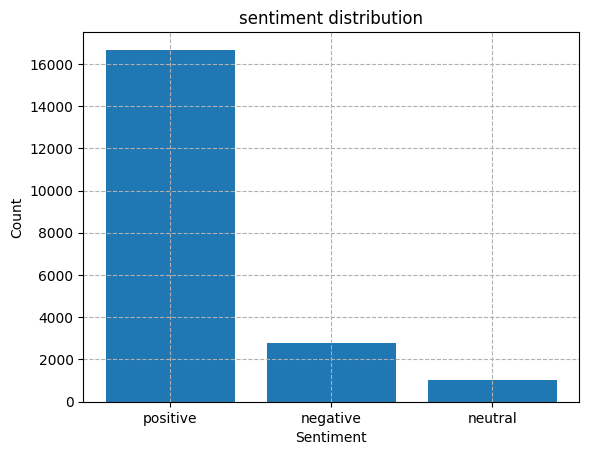

In [4]:
sentiment_counts=data['Sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('sentiment distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(linestyle='--')
plt.show()


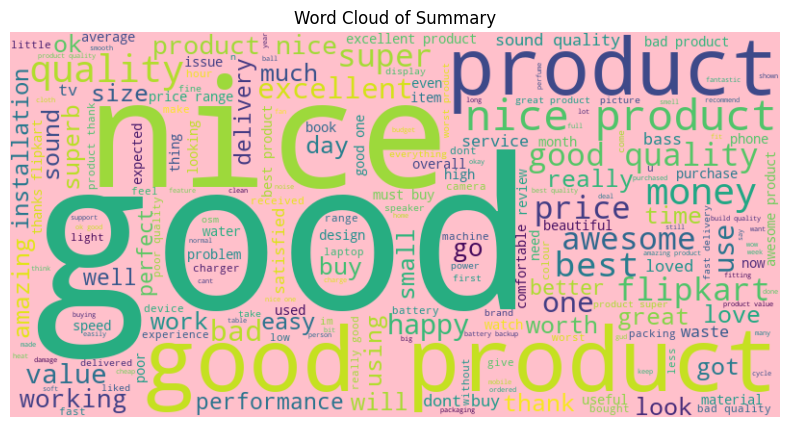

In [5]:
text=' '.join(data['Summary'].dropna())
wordcloud=WordCloud(width=800, height=400, background_color='pink').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Summary')
plt.show()

In [8]:
data=data.dropna()
X=data['Summary']
y=data['Sentiment']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [9]:
vectorizer=CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test) 

In [10]:
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train_counts,y_train)

MultinomialNB()

In [11]:
y_pred=NB_classifier.predict(X_test_counts) 
accuracy_nb=accuracy_score(y_test,y_pred) 
print("Multinomial naive bayes accuracy:",accuracy_nb)
print("Multinomial naive bayes classification report: ")
print(classification_report(y_test, y_pred))

Multinomial naive bayes accuracy: 0.896398891966759
Multinomial naive bayes classification report: 
              precision    recall  f1-score   support

    negative       0.82      0.63      0.71       464
     neutral       0.78      0.04      0.08       172
    positive       0.90      0.99      0.94      2974

    accuracy                           0.90      3610
   macro avg       0.84      0.55      0.58      3610
weighted avg       0.89      0.90      0.87      3610



In [12]:
RF_classifier=RandomForestClassifier(n_estimators=100, random_state=42)
RF_classifier.fit(X_train_counts, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred_rf=RF_classifier.predict(X_test_counts)
accuracy_rf=accuracy_score(y_test,y_pred_rf)
print("\nRandom Forest Classifier Accuracy: ",accuracy_rf)
print("Random Forests Classifier Classification Report:")
print(classification_report(y_test,y_pred_rf))


Random Forest Classifier Accuracy:  0.9274238227146815
Random Forests Classifier Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.78      0.82       464
     neutral       0.67      0.34      0.45       172
    positive       0.95      0.98      0.96      2974

    accuracy                           0.93      3610
   macro avg       0.82      0.70      0.74      3610
weighted avg       0.92      0.93      0.92      3610



In [22]:
def sentiment_mt(text):
    text_counts=vectorizer.transform([text])
    prediction=NB_classifier.predict(text_counts)[0]
    return prediction

In [23]:
def sentiment_rf(text):
    text_counts=vectorizer.transform([text])
    prediction=RF_classifier.predict(text_counts)[0]
    return prediction

In [24]:
input_text="really good bad product"
sentiment=sentiment_mt(input_text)
print("Predicted sentiment:",sentiment)

Predicted sentiment: positive


In [25]:
input_text="ok ok product"
sentiment=sentiment_rf(input_text)
print("Predicted sentiment: ",sentiment)

Predicted sentiment:  neutral


In [26]:
input_text="is good for many"
sentiment=sentiment_rf(input_text)
print("Predicted sentiment: ",sentiment)


Predicted sentiment:  positive
